In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import imutils

## Image Rotation


(6000, 9000, 3)


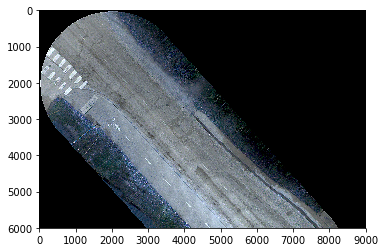

In [400]:
img2 = cv2.imread('./road_images/road_detection3.jpg')
# print(img2.shape)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img2_rotated = imutils.rotate_bound(img2, 44)
# cv2.imwrite('./road_detection_rotated.jpg', img2_rotated)
# img = cv2.imread('./road_images/road_detection_rotated.jpg')
img_cropped = img2
img_cropped = img2[0:6000,0:9000,:]
# img_cropped = imutils.rotate_bound(img_cropped, 180)
plt.imshow(img_cropped)
cv2.imwrite('./road_images/road_detection_cropped.jpg', img_cropped)
print(img_cropped.shape)

## Choosing Source and Destination points for P.transformation

(6000, 9000, 3)


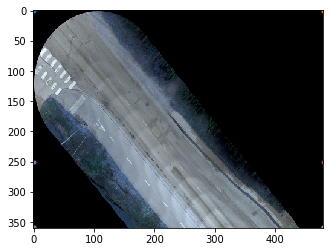

In [401]:
img = cv2.imread('./road_images/cropped_transformed_images/road_detection_cropped7_bigger.jpg')
print(img.shape)
# img = imutils.rotate_bound(img, 180)
img_cropped = cv2.resize(img, (480, 360), interpolation = cv2.INTER_AREA) # (Width,height)
# cv2.imwrite('./road_images/cropped_transformed_images/road_detection_cropped6.jpg', img_cropped)
# img_cropped = imutils.resize(img, width = 480, height = 360) # Use imutils  for resizing when you want to keep the aspect ratio of the image intact.
img_shape = img_cropped.shape

# For road_detection_rotated_cropped.jpg
# src=np.array([[0,2499],[0,0],[3999,0],[3999,2499]], np.float32)
# dst = np.array([[0,2499],[1800,1500],[2100,1500],[3999,2499]], np.float32)

# For road_detection_small2.png
y_after_transform = int(0.70*img_shape[0])
src = np.array([[0,0],[img_shape[1]-1,0],[img_shape[1]-1, img_shape[0]-1],[0,img_shape[0]-1]], np.float32)
dst = np.array([[0,y_after_transform],[img_shape[1]-1,y_after_transform],[img_shape[1]-1,img_shape[0]-1],[0,img_shape[0]-1]],np.float32)

plt.imshow(img_cropped)

# Plotting source points
plt.plot(src[0][0], src[0][1], '.')
plt.plot(src[1][0], src[1][1], '.')
plt.plot(src[2][0], src[2][1], '.')
plt.plot(src[3][0], src[3][1], '.')

# # Plotting destination points
plt.plot(dst[0][0], dst[0][1],'.')
plt.plot(dst[1][0], dst[1][1], '.')
plt.plot(dst[2][0], dst[2][1], '.')
plt.plot(dst[3][0], dst[3][1], '.')

## Warping the Perspective

In [402]:
def warp(img, src, dst):
    img_size = (img.shape[1], img.shape[0])
    
    #Get the perspective Transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    #Create Warped Image - uses Linear Interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags = cv2.INTER_LINEAR)
    return warped


True

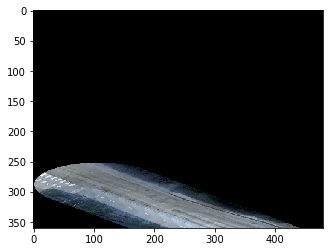

In [406]:
warped = warp(img_cropped, src,dst)

plt.imshow(warped)
# img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2BGR)
cv2.imwrite('./road_images/cropped_transformed_images/road_detection_transformed7_bigger.jpg', warped)

## Inverse warping the perspective

In [407]:
def warp_inverse(img,src,dst):
    img_size = (img.shape[1], img.shape[0])
    
    M_inv = cv2.getPerspectiveTransform(dst,src)
    warped_inv = cv2.warpPerspective(img, M_inv, img_size, flags = cv2.INTER_LINEAR)
    return warped_inv

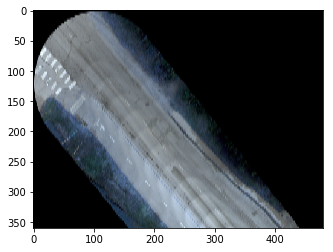

In [408]:
warped_inverse = warp_inverse(warped, src,dst)
plt.imshow(warped_inverse)

In [363]:
# warped[np.where(warped == 0)] = 255
# plt.imshow(warped)
# cv2.imwrite('./road_images/road_detection_small_rotated_transformed2_whitebkg.jpg', warped)

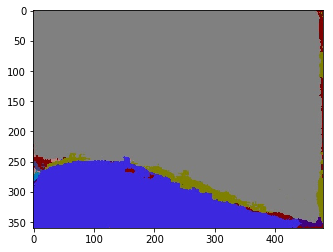

In [410]:
# img_seg = cv2.imread('./road_images/cropped_transformed_images/segmented7_bigger.png')
# cv2.imwrite('./road_images/cropped_transformed_images/segmented7_bigger.jpg', img_seg)
img_seg = cv2.imread('./road_images/cropped_transformed_images/segmented7_bigger.jpg')
img_seg = cv2.cvtColor(img_seg, cv2.COLOR_BGR2RGB)
plt.imshow(img_seg)

In [411]:
warped_inverse = warp_inverse(img_seg,src,dst)
# warped_inverse = cv2.cvtColor(warped_inverse, cv2.COLOR_BGR2RGB)

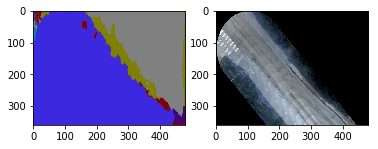

In [412]:
Nr = 1
Nc = 2
images = [warped_inverse, img_cropped]
fig = plt.figure()

for n,image in enumerate(images):
    a = fig.add_subplot(1,2,n+1)
#     image = cv2.resize(image,(4000,4000), interpolation = cv2.INTER_AREA)
    plt.imshow(image)
plt.show()

## Finding HSV values of different clusters in the segmented road.

[ 60  41 221]
[ 60  40 223]


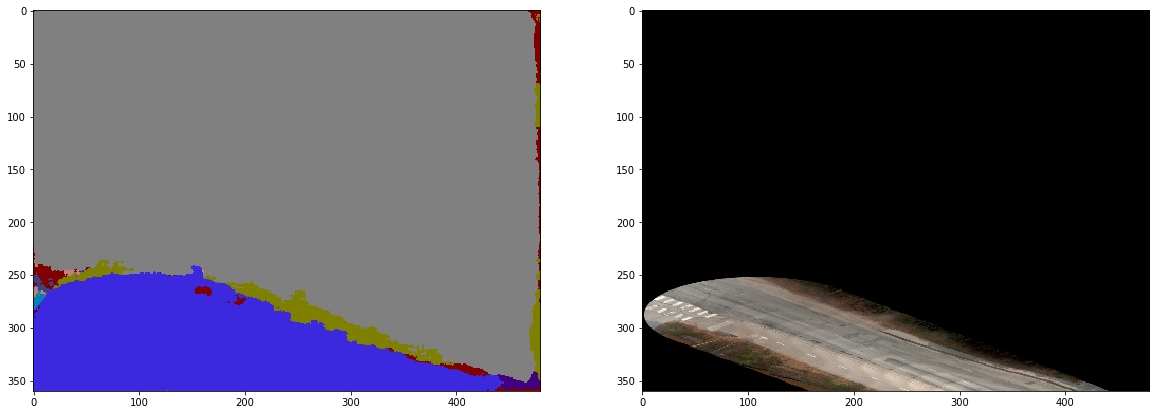

In [413]:
img_segmented = plt.imread('./road_images/cropped_transformed_images/segmented7_bigger.jpg')

img_original_transformed = cv2.imread('./road_images/cropped_transformed_images/road_detection_transformed7_bigger.jpg')
img_original_transformed = cv2.cvtColor(img_original_transformed, cv2.COLOR_BGR2RGB)
print(img_segmented[350,400])
print(img_segmented[310,100])

Nr = 1
Nc = 2
images = [img_segmented, img_original_transformed]
fig = plt.figure(figsize=(20,20))

for n,image in enumerate(images):
    a = fig.add_subplot(1,2,n+1)
#     image = cv2.resize(image,(4000,4000), interpolation = cv2.INTER_AREA)
    plt.imshow(image)
plt.show()

img_original_transformed_hsv = cv2.cvtColor(img_original_transformed, cv2.COLOR_RGB2HSV)

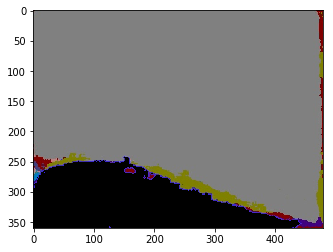

In [414]:
test_img = np.copy(img_segmented)
red_threshold = np.where((test_img[:,:,0] >= 50) & (test_img[:,:,0]<=70))
green_threshold = np.where((test_img[:,:,1] >= 30) & (test_img[:,:,1]<=50))
blue_threshold = np.where((test_img[:,:,2] >= 213) & (test_img[:,:,2]<=233))
road_pixels = red_threshold and green_threshold and blue_threshold 
test_img[road_pixels] =[0,0,0] 
plt.imshow(test_img)
#   & (test_img[:,:,1] == 40) & (test_img[:,:,2] == 223))`

In [415]:
cluster_road_pixels_h = []
cluster_road_pixels_s = []
cluster_road_pixels_v = []

for y,x in zip(road_pixels[0], road_pixels[1]):
    cluster_road_pixels_h.append(img_original_transformed_hsv[y,x,0])
    cluster_road_pixels_s.append(img_original_transformed_hsv[y,x,1])
    cluster_road_pixels_v.append(img_original_transformed_hsv[y,x,2])

In [416]:
mean_cluster_road_pixels_h = np.mean(cluster_road_pixels_h)
stdev_cluster_road_pixels_h = np.std(cluster_road_pixels_h)

mean_cluster_road_pixels_s = np.mean(cluster_road_pixels_s)
stdev_cluster_road_pixels_s = np.std(cluster_road_pixels_s)

mean_cluster_road_pixels_v = np.mean(cluster_road_pixels_v)
stdev_cluster_road_pixels_v = np.std(cluster_road_pixels_v)

print(mean_cluster_road_pixels_v)
print(stdev_cluster_road_pixels_v)

104.0223276674575
61.17739336576827


In [417]:
min_road_pixel_h = mean_cluster_road_pixels_h - stdev_cluster_road_pixels_h
max_road_pixel_h = mean_cluster_road_pixels_h + stdev_cluster_road_pixels_h

min_road_pixel_s = mean_cluster_road_pixels_s - stdev_cluster_road_pixels_s
max_road_pixel_s = mean_cluster_road_pixels_s + stdev_cluster_road_pixels_s

min_road_pixel_v = mean_cluster_road_pixels_v - stdev_cluster_road_pixels_v
max_road_pixel_v = mean_cluster_road_pixels_v + stdev_cluster_road_pixels_v

# print(min_road_pixel_s, max_road_pixel_s)
img_original_transformed_hsv_copy = np.copy(img_original_transformed_hsv)


# h_threshold = np.where((img_original_transformed_hsv_copy[:,:,0] <= max_road_pixel_h) & (img_original_transformed_hsv_copy[:,:,0] >= min_road_pixel_h))
# s_threshold = np.where((img_original_transformed_hsv_copy[:,:,1] <= max_road_pixel_s) & (img_original_transformed_hsv_copy[:,:,1] >= min_road_pixel_s))
# v_threshold = np.where((img_original_transformed_hsv_copy[:,:,2] <= max_road_pixel_v) & (img_original_transformed_hsv_copy[:,:,2] >= min_road_pixel_v))

h_threshold = (img_original_transformed_hsv_copy[:,:,0] <= max_road_pixel_h) & (img_original_transformed_hsv_copy[:,:,0] >= min_road_pixel_h)
s_threshold = (img_original_transformed_hsv_copy[:,:,1] <= max_road_pixel_s) & (img_original_transformed_hsv_copy[:,:,1] >= min_road_pixel_s)
v_threshold = (img_original_transformed_hsv_copy[:,:,2] <= max_road_pixel_v) & (img_original_transformed_hsv_copy[:,:,2] >= min_road_pixel_v)
# img_original_transformed_hsv_copy[h_threshold and s_threshold and v_threshold] = [0,0,0]

img_original_transformed_copy_all_threshold = np.copy(img_original_transformed)
img_original_transformed_copy_s_threshold = np.copy(img_original_transformed)

img_original_transformed_copy_all_threshold[h_threshold & s_threshold & v_threshold] = [255,255,255]
img_original_transformed_copy_s_threshold[s_threshold] = [255,255,255]

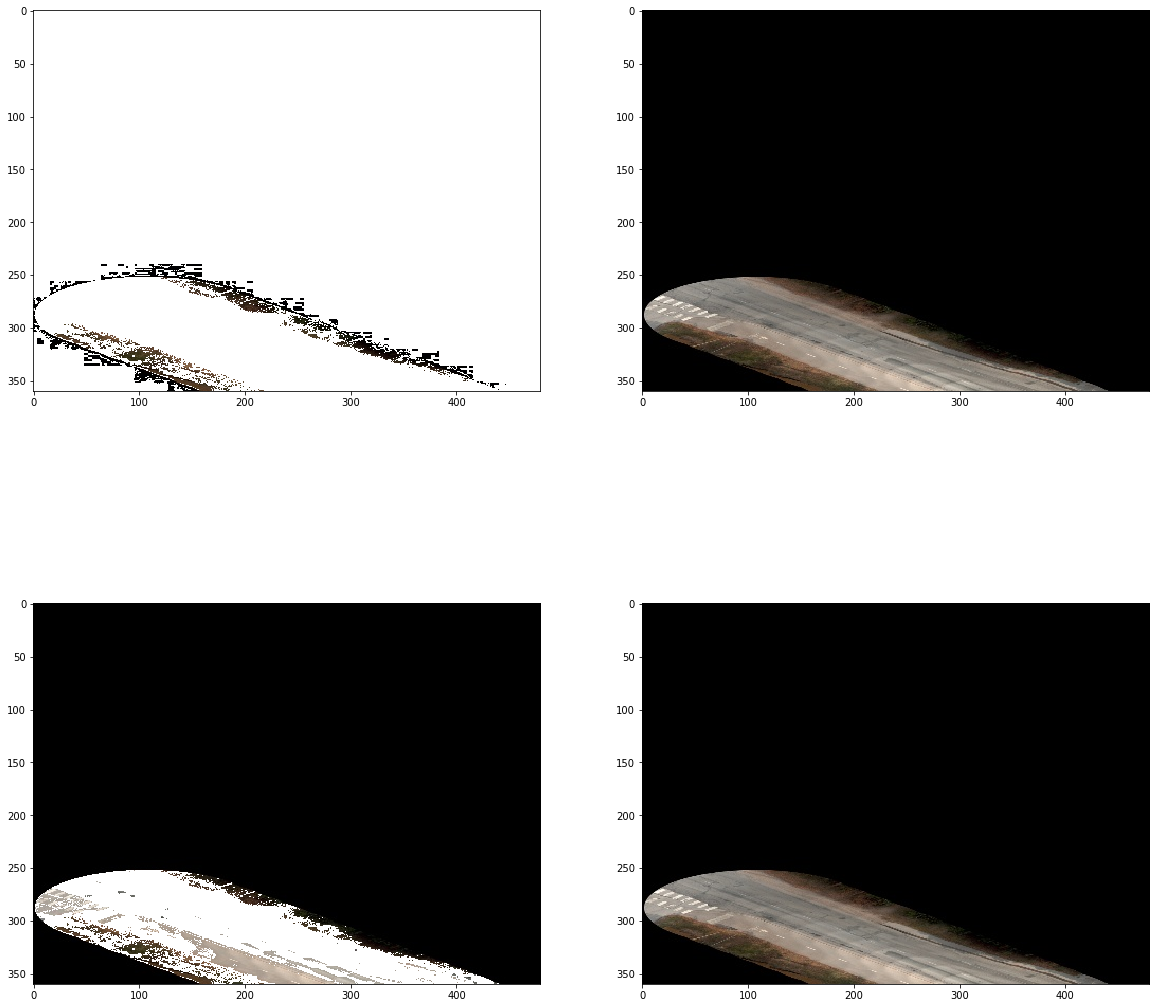

In [418]:
# Loading the non-segmented perspective transformed image.
# plt.imshow(img_original_transformed_copy)
Nr = 1
Nc = 2
images = [img_original_transformed_copy_s_threshold, img_original_transformed, img_original_transformed_copy_all_threshold, img_original_transformed]
fig = plt.figure(figsize=(20,20))

for n,image in enumerate(images):
    a = fig.add_subplot(2,2,n+1)
#     image = cv2.resize(image,(4000,4000), interpolation = cv2.INTER_AREA)
    plt.imshow(image)
plt.show()

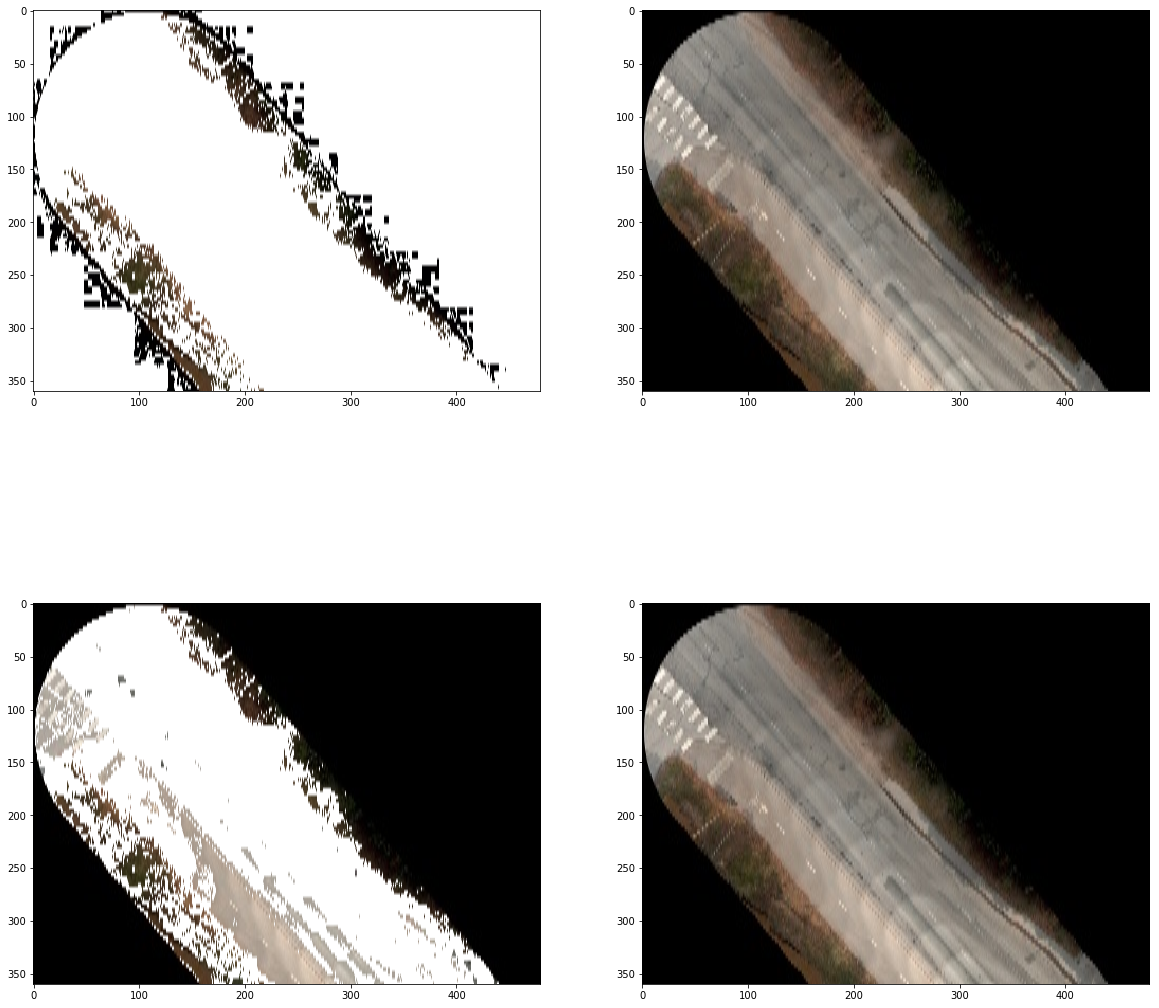

In [419]:
warped_inverse_s_threshold = warp_inverse(img_original_transformed_copy_s_threshold, src,dst)
warped_inverse_all_threshold = warp_inverse(img_original_transformed_copy_all_threshold, src, dst)
warped_inverse_original_image = warp_inverse(img_original_transformed, src, dst)

Nr = 1
Nc = 2
images = [warped_inverse_s_threshold, warped_inverse_original_image, warped_inverse_all_threshold, warped_inverse_original_image]
fig = plt.figure(figsize=(20,20))

for n,image in enumerate(images):
    a = fig.add_subplot(2,2,n+1)
#     image = cv2.resize(image,(4000,4000), interpolation = cv2.INTER_AREA)
    plt.imshow(image)
plt.show()

## Edge Detection

In [420]:
# warped_inverse_s_threshold_gray = cv2.cvtColor(warped_inverse_s_threshold, cv2.COLOR_RGB2GRAY)

In [421]:
def nothing(x):
    pass

# cv2.namedWindow('Edge detection')
# cv2.createTrackbar('Min Threshold','Edge detection',0,255,nothing)
# cv2.createTrackbar('Max Threshold','Edge detection',0,255,nothing)

img = warped_inverse_s_threshold

# while(1):
#     # get current positions of four trackbars
#     minimum = cv2.getTrackbarPos('Min Threshold','Edge detection')
#     maximum = cv2.getTrackbarPos('Max Threshold','Edge detection')
# #     print(minimum, maximum)
#     edges = cv2.Canny(img, minimum, maximum, apertureSize = 3)
    
#     cv2.imshow('Edge detection',edges)
#     k = cv2.waitKey(1) & 0xFF
#     if k == 27:
#         break
# cv2.destroyAllWindows()

In [422]:
hist_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
histogram = cv2.calcHist([hist_img],[0], None, [256],[0,256])
histogram_mean = np.mean(hist_img.ravel())
min_threshold = 0.66*histogram_mean
max_threshold = min(255, 1.33*histogram_mean)
print(min_threshold, max_threshold)
# plt.hist(hist_img.ravel(), 256, [0,256])
# plt.plot(histogram)
# plt.show()

151.68143680555556 255


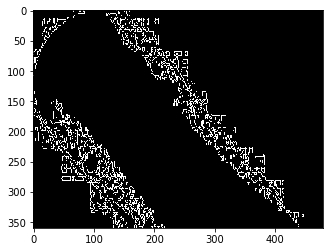

In [423]:
edges = cv2.Canny(warped_inverse_s_threshold, min_threshold, max_threshold, apertureSize = 3,L2gradient=False)
plt.imshow(edges, cmap = 'gray')

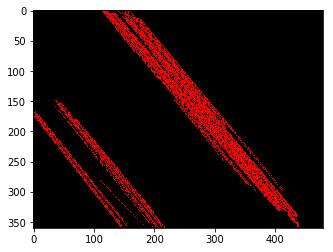

In [434]:
def slope(x1,y1,x2,y2):
    return math.atan((y2-y1)/(x2-x1+0.00001))*180/np.pi
slopes = []

rho = 1
theta = 1*np.pi/180
threshold = 50
min_line_length = 30
max_line_gap = 30
line_image = np.copy(img)*0 #Image to draw lines upon

lines = cv2.HoughLinesP(edges,rho,theta,threshold, np.array([]), min_line_length, max_line_gap)

#Evaluating mean and std_dev of slope of lines.
for line in lines:
    for x1,y1,x2,y2 in line:
        slope_of_line = slope(x1,y1,x2,y2)
        if(slope_of_line < 0):
            slope_of_line+= 180.0
        slopes.append(slope_of_line)
        
mean_slope = np.mean(slopes)
std_dev_slope = np.std(slopes)

min_slope = mean_slope - 0.5*std_dev_slope
max_slope = mean_slope + 0.5*std_dev_slope

j = 0
lines_desired_slope = []
for i,line in enumerate(lines):
    for x1,y1,x2,y2 in line:
        if(slopes[i] >= min_slope and slopes[i] <= max_slope):
            j+=1
            lines_desired_slope.append([[x1,y1,x2,y2]])
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)

plt.imshow(line_image)

## Rotating the original image

In [435]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w / 2, h / 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH)), M

This image is obtained by rotating the original


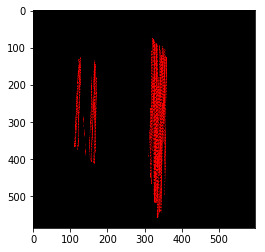

In [436]:
line_image_rotated,M = rotate_bound(line_image, 90 - mean_slope)
print("This image is obtained by rotating the original")
plt.imshow(line_image_rotated, cmap='gray')

## Generating the points after rotation

In [437]:
def rotate_point(x,y,M, scale = 1.0):
#     M = cv2.getRotationMatrix2D(center, angle, scale)
#     M = np.vstack([M,[0,0,1]])
    new_point = np.matmul(M, [x,y,1])[:2]
    return new_point

lines_rotated = []

# angle = mean_slope - 90
# center = (line_image.shape[1]//2, line_image.shape[0]//2)

for line in lines_desired_slope:
    new_x1y1 = rotate_point(line[0][0], line[0][1],M)
    new_x2y2 = rotate_point(line[0][2], line[0][3],M)
    
    lines_rotated.append([[int(new_x1y1[0]), int(new_x1y1[1]), int(new_x2y2[0]), int(new_x2y2[1])]])

This image is generated by plotting the rotated points.


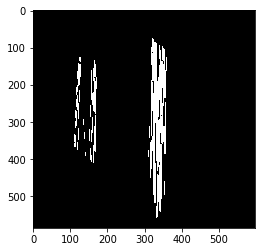

In [438]:
line_image_rotated_points = np.copy(line_image_rotated) * 0

for line in lines_rotated:
    x1,y1,x2,y2 = line[0][0],line[0][1],line[0][2],line[0][3]
    cv2.line(line_image_rotated_points, (x1,y1), (x2,y2),(255),1)
    
line_image_rotated_points_gray = cv2.cvtColor(line_image_rotated_points, cv2.COLOR_RGB2GRAY)
print("This image is generated by plotting the rotated points.")
plt.imshow(line_image_rotated_points_gray,cmap='gray')

In [ ]:
test_img = np.copy(line_image_rotated_points_gray) 
test_img = cv2.dilatet

## Generating histogram to evaluate pixel density

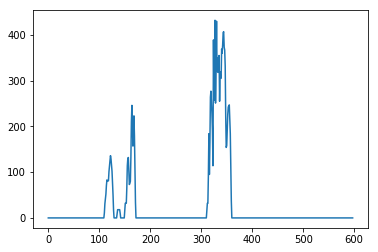

In [439]:
line_image_rotated_points_gray[np.where(line_image_rotated_points_gray[:,:] != 0)] = 1

vertical_sum = np.sum(line_image_rotated_points_gray, axis = 0)
plt.plot(np.arange(0,line_image_rotated_points_gray.shape[1],1), vertical_sum)
plt.show()

In [430]:
wave_bases = []
left_base = [] #Location on the axis, density value.
right_base = []
left_base_defined_flag = False

for location, pixel_bin in enumerate(vertical_sum):
    if(pixel_bin == 0 and left_base_defined_flag == False): continue
    else:
        if(left_base_defined_flag == False and pixel_bin != 0):
            left_base = [location-1, vertical_sum[location-1]]
            left_base_defined_flag = True
        elif(pixel_bin == 0):
            right_base = [location-1, vertical_sum[location-1]]
            left_base_defined_flag = False
            wave_bases.append([left_base[0], right_base[0]])
print(wave_bases)

[[107, 130], [132, 143], [147, 173], [308, 361]]


In [431]:
def find_length(x1,y1,x2,y2):
    return pow((x1-x2)**2+(y1-y2)**2, 0.5)


box_height = 30
shape = line_image_rotated_points_gray.shape
min_x = 0.0
max_x = shape[1] - 1
min_y = 0.0
max_y = shape[0] - 1

final_lines = []
for base in wave_bases:
    mean_x = (base[0]+base[1])/2.0
    box_width = base[1] - base[0]
    box_left_x = max(min_x, mean_x - (box_width/2.0))
    box_right_x = min(max_x, mean_x + (box_width/2.0))
    box_bottom_y = line_image_rotated_points_gray.shape[0]
    box_top_y = box_bottom_y - box_height
#     print("New Base")
    base_lines = []
    while(box_top_y >  0):
        
#         print(box_left_x, box_right_x, box_bottom_y, box_top_y)
        lines_in_base_region = [] #Position of the line in the list - LINES.
        length_sum = 0
        for i, line in enumerate(lines_rotated):
            x1,y1,x2,y2 = line[0][0], line[0][1], line[0][2], line[0][3]

            if(x2 >= box_left_x and x2 <= box_right_x and y2 <= box_bottom_y and y2 >= box_top_y):
                length = find_length(x1,y1,x2,y2)
                length_sum+=length
                lines_in_base_region.append([i, length])

        mean_coords = np.zeros(4)
        if(len(lines_in_base_region) > 0):
            for line, length in lines_in_base_region:
                rotated_point = lines_rotated[line][0]
                mean_coords+=[int(coord * length) for coord in rotated_point]
            mean_coords /= length_sum
            mean_coords = [int(coord) for coord in mean_coords]
            
#             if(len(base_lines) > 0):
#                 previous_line = base_lines[len(base_lines-1)]
#                 length1 = find_length(previous_line[0],previous_line[1],previous_line[2],previous_line[3])
#                 length2 = find_length(mean_coords[0], mean_coords[1], mean_coords[2], mean_coords[3])
                
#                 mean_coords*= length2 
#                 mean_coords+=[int(coord * length1) for coord in previous_line]
#                 mean_coords/=(length1+length2)
                
            base_lines.append(mean_coords)
            
#             box_left_x = max(min_x,mean_coords[0] - (box_width/2.0))
#             box_right_x = min(max_x, mean_coords[2] + (box_width/2.0))
            
        box_bottom_y-= box_height
        box_top_y-= box_height
    
#     print("Base lines ")
#     print(base_lines)
    
    base_lines_weighted = []
    total_length = 0
    
    for line in base_lines:
        length = find_length(line[0], line[1], line[2], line[3])
        total_length+=length
        base_lines_weighted.append([coord*length for coord in line])
    
    combined_line = []
    for i in range(4):
        sum_coords = 0
        for j in range(0, len(base_lines_weighted)):
            sum_coords+=base_lines_weighted[j][i]
        sum_coords/=total_length
        sum_coords = int(sum_coords)
        combined_line.append(sum_coords)
    
    final_lines.append(combined_line)
            
print(final_lines)

[[124, 129, 115, 367], [134, 281, 140, 390], [164, 144, 159, 403], [335, 108, 333, 451]]


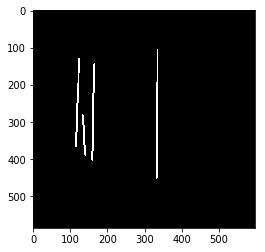

In [432]:
final_lines_img = np.copy(line_image_rotated_points_gray)*0
for line in final_lines:
    cv2.line(final_lines_img, (line[0], line[1]), (line[2], line[3]), 255, 3)
plt.imshow(final_lines_img,cmap='gray')

True

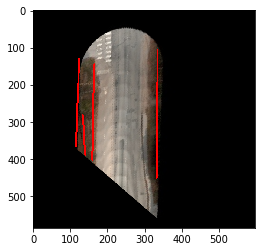

In [433]:
mask = np.where(final_lines_img != 0)
original_image_rotated = np.copy(warped_inverse_original_image)
original_image_rotated = imutils.rotate_bound(original_image_rotated, 90-mean_slope)
original_image_rotated[mask] = [255,0,0]
plt.imshow(original_image_rotated)
original_image_rotated = cv2.cvtColor(original_image_rotated, cv2.COLOR_BGR2RGB)
cv2.imwrite('./road_images/result_images/rd_transformed7_bigger.png', original_image_rotated)